#**STEP1 : READING AND UNDERSTANDING THE DATA**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
 #Importing necessory libraries
import pandas as pd
import numpy as npnpnp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
#Read the data from CSV file
boom_bike = pd.read_csv('/content/drive/MyDrive/project/day (3).csv')

In [7]:
boom_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#Finding shape of data
boom_bike.shape

(730, 16)

In [9]:
# Information of data
boom_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Finding null values if any
boom_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Dropping unwanted columns
boom_bike.drop('casual',axis=1, inplace = True)
boom_bike.drop('registered',axis=1, inplace = True)
boom_bike.drop('workingday',axis=1, inplace = True)
boom_bike.drop('dteday',axis=1, inplace = True)
boom_bike.drop('instant',axis=1, inplace = True)

In [12]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# New columns
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#**STEP2 : DATA VISUALIZATION**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x1500 with 0 Axes>

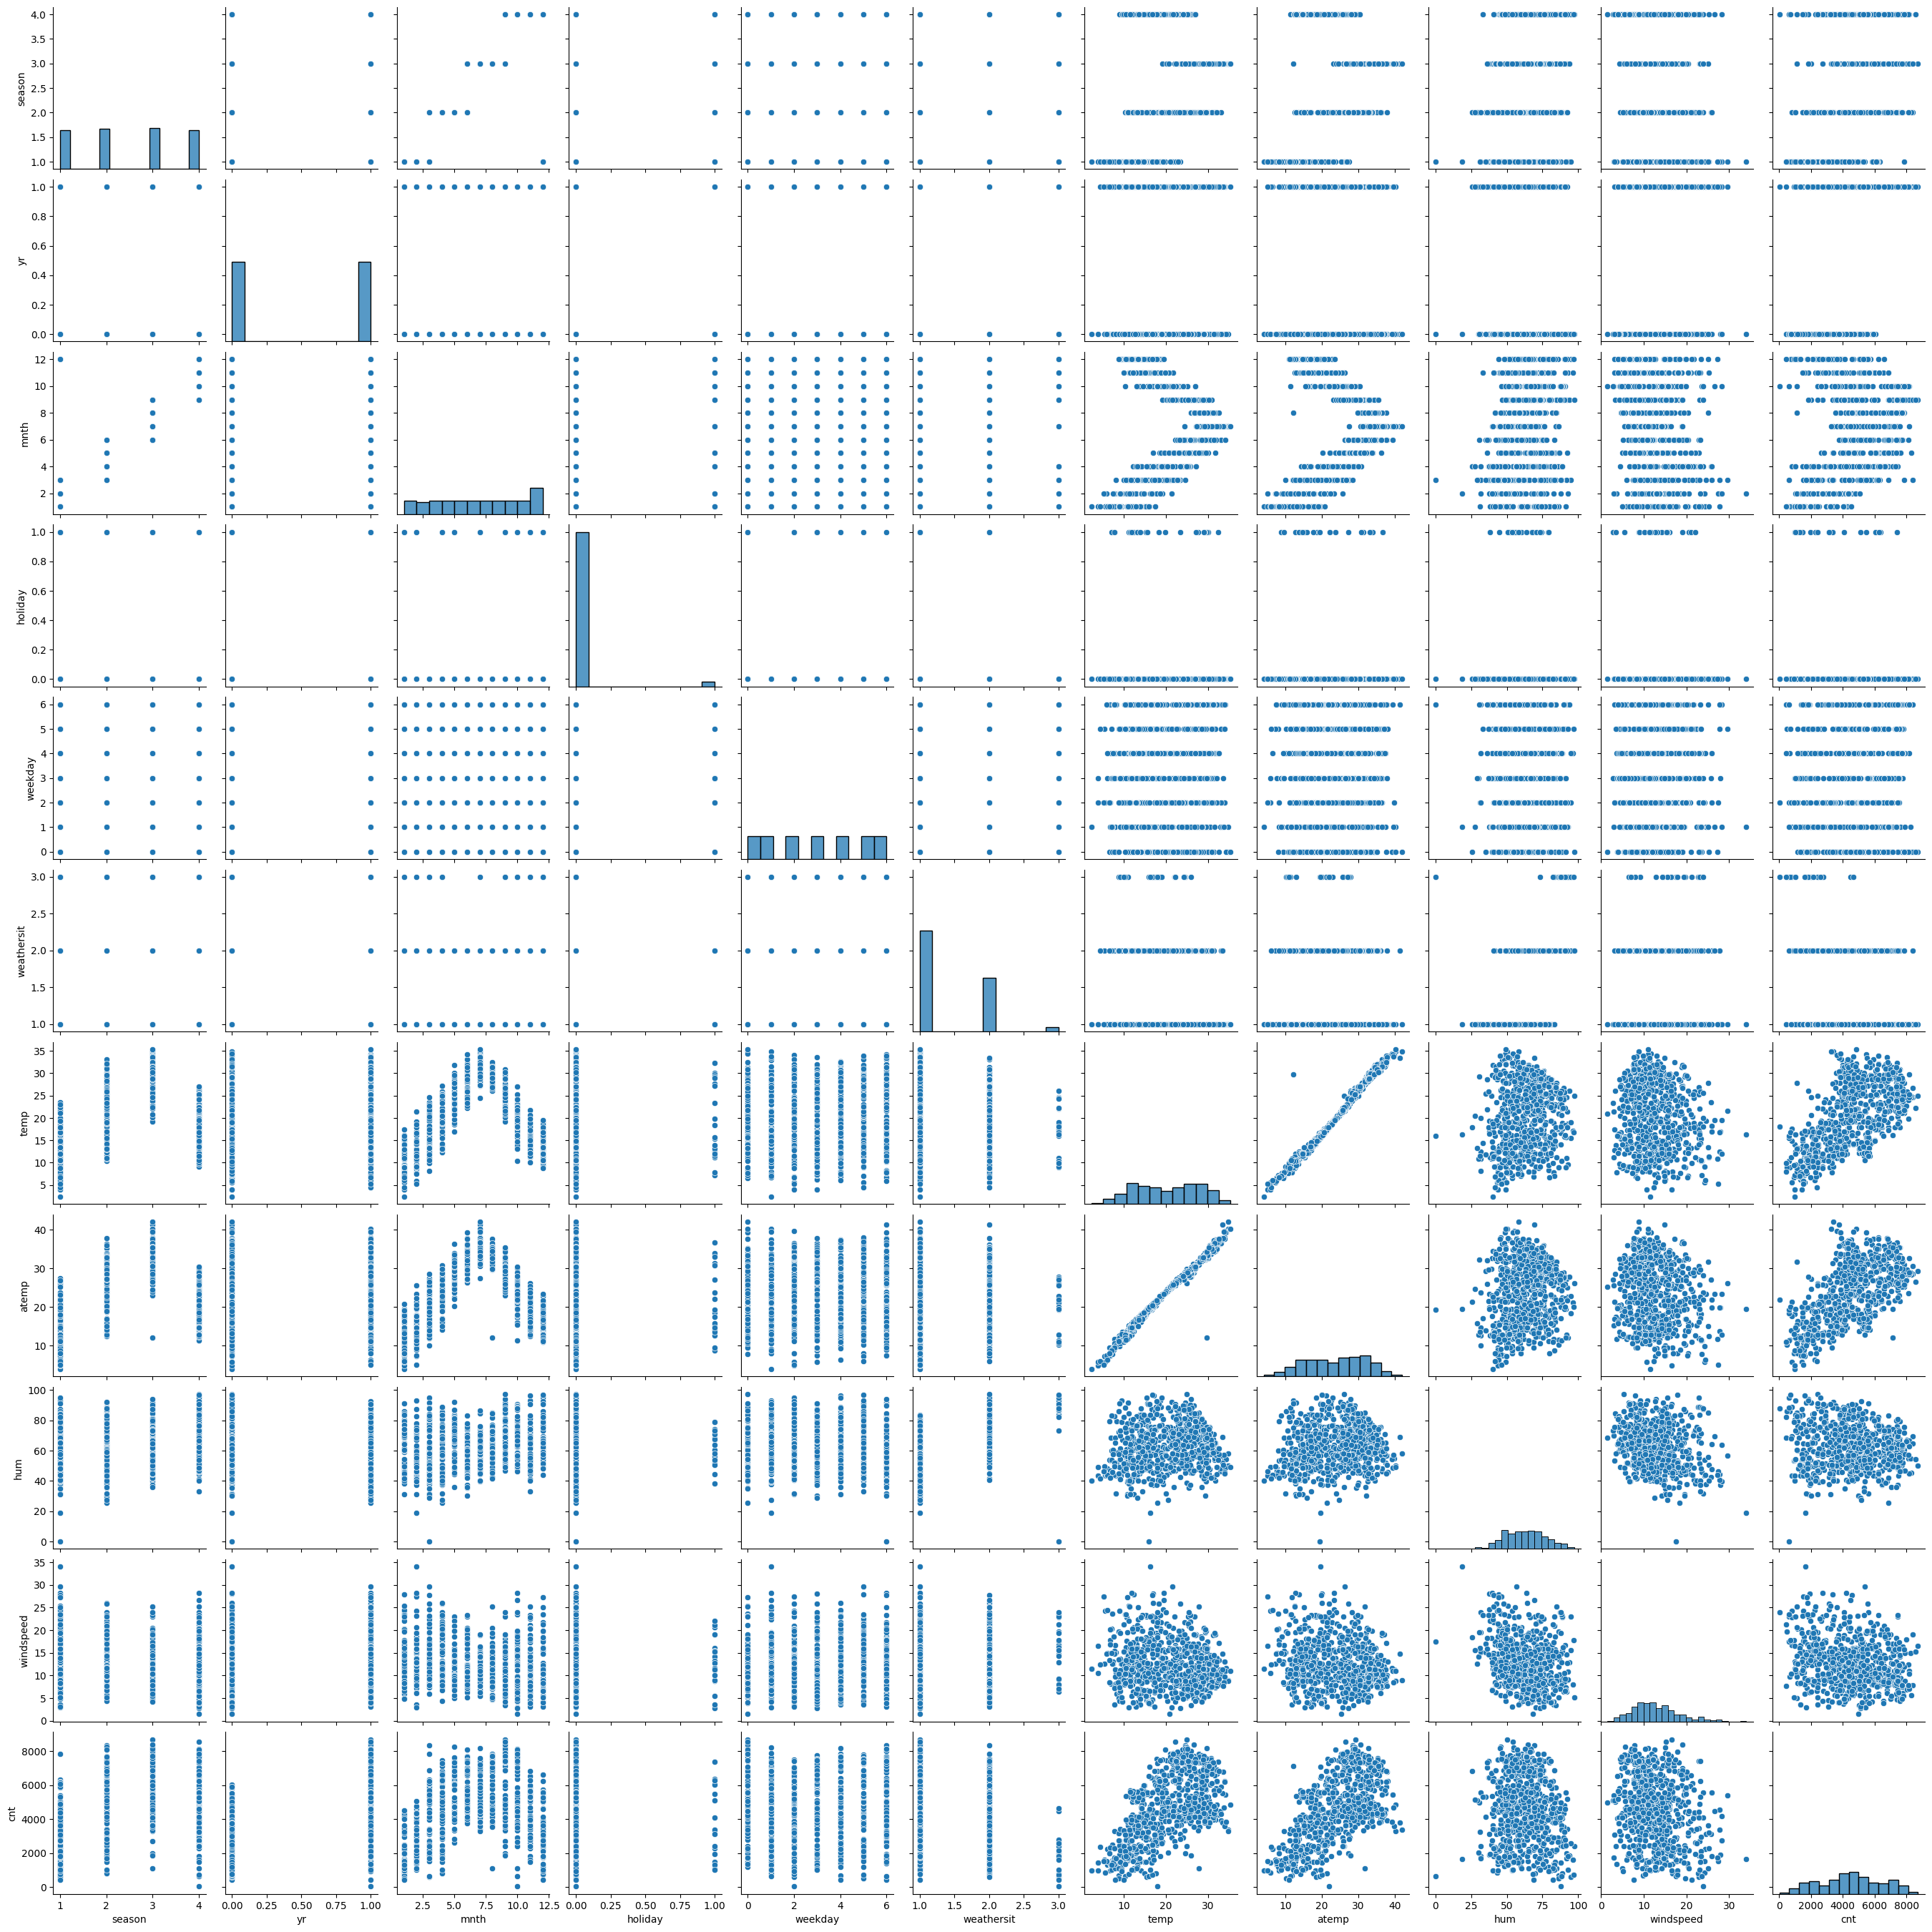

In [15]:
# PLOTTING PAIRPLOT
plt.figure(figsize = (20, 15))
sns.pairplot(boom_bike)
plt.show()

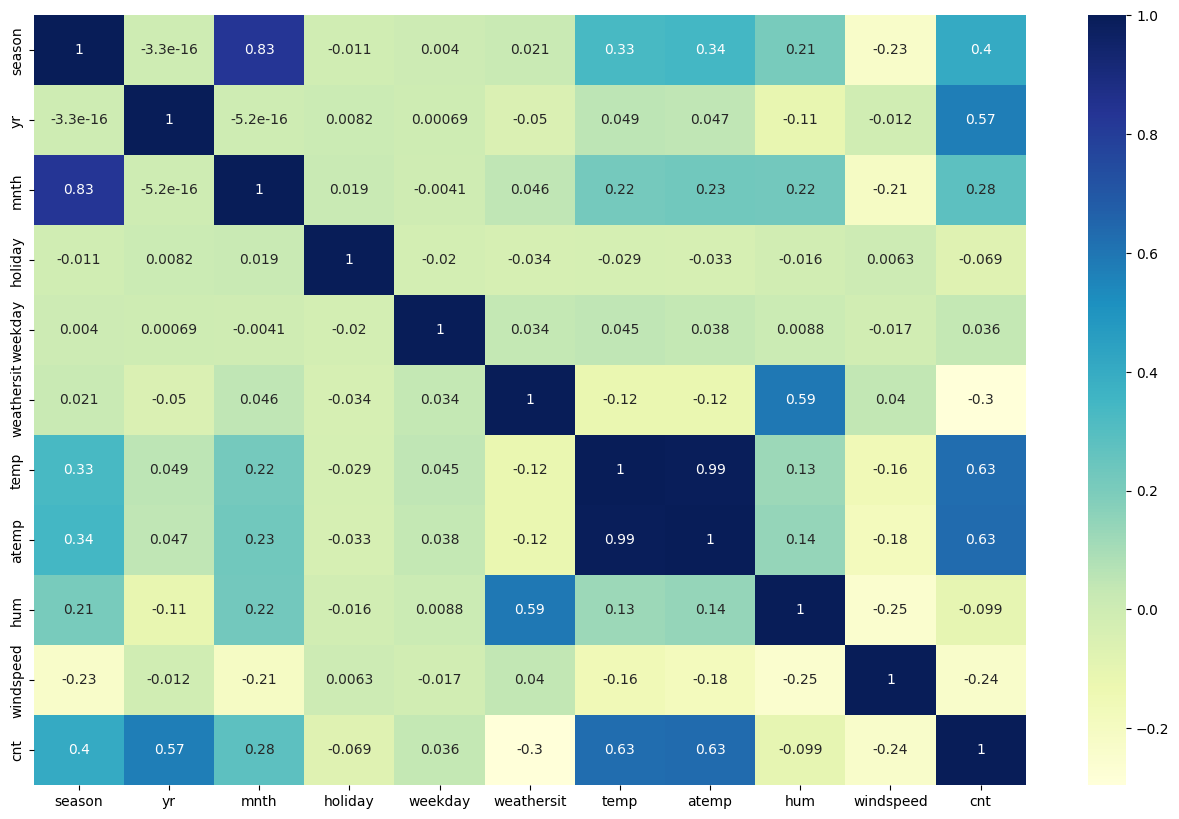

In [16]:
#PLOTTING HEATMAP
plt.figure(figsize = (16, 10))
sns.heatmap(boom_bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [17]:
boom_bike['season']=boom_bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
boom_bike['mnth']=boom_bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boom_bike['weathersit']=boom_bike.weathersit.map({1: 'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Snow_Fog'})
boom_bike['weekday']=boom_bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [18]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,Clear,9.305237,11.46350,43.6957,12.522300,1600


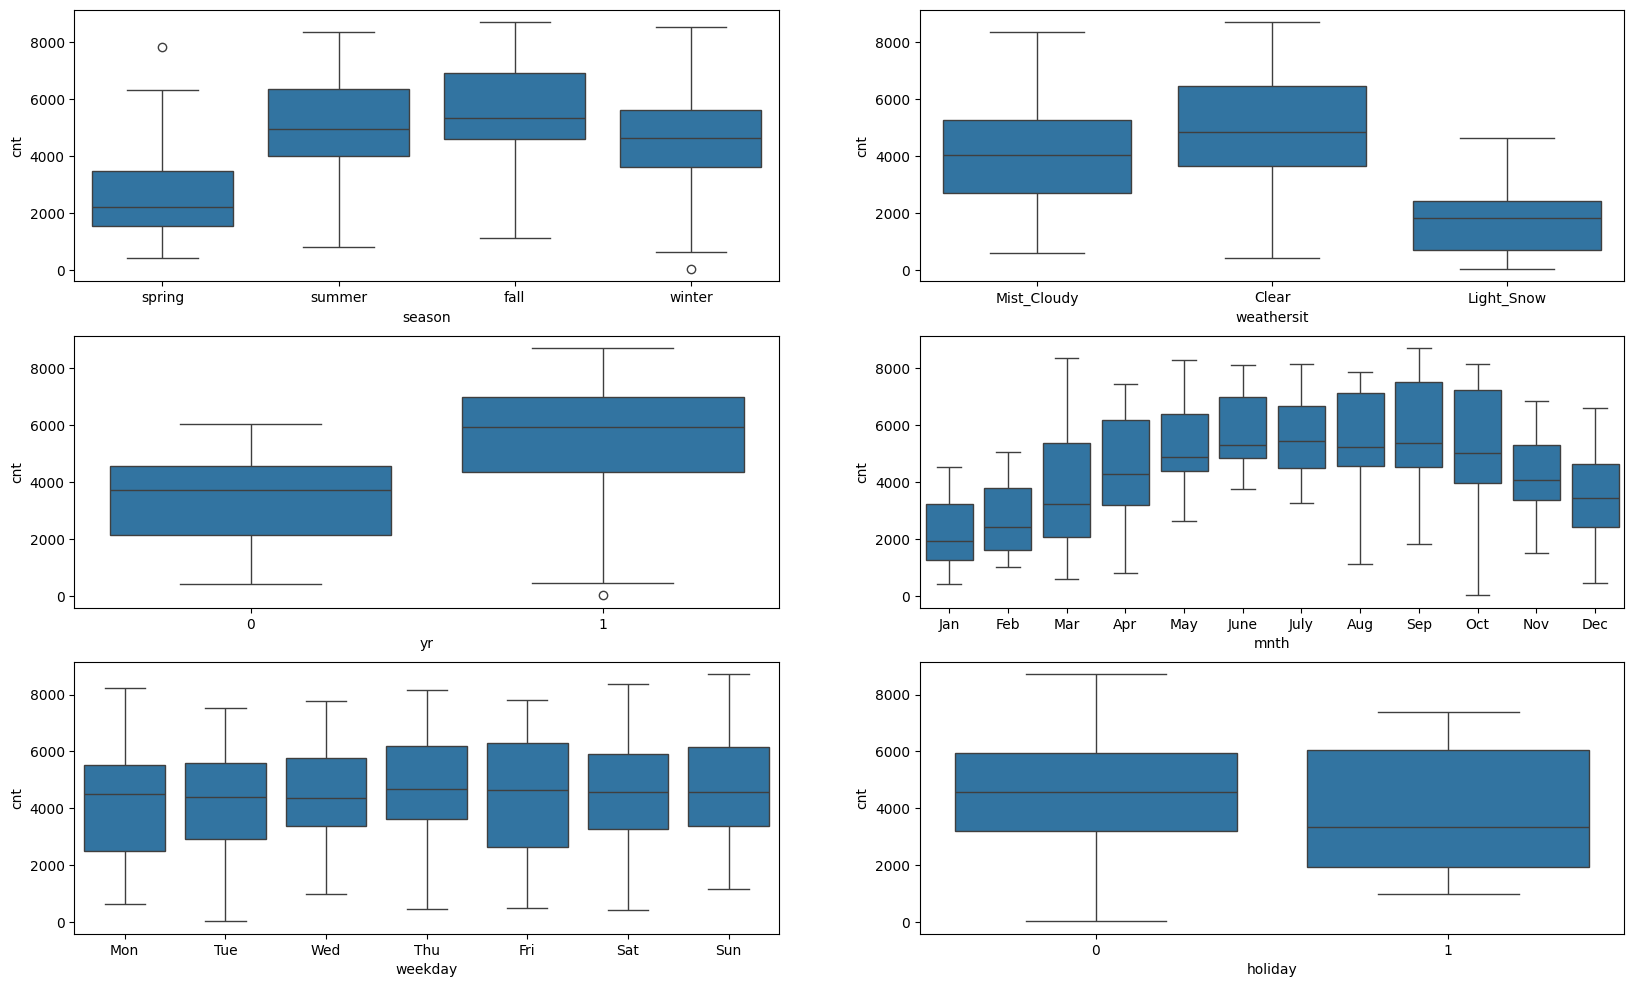

In [19]:
#PLOTTING BOXPLOT
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = boom_bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boom_bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = boom_bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = boom_bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = boom_bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = boom_bike)
plt.show()

<Axes: xlabel='season', ylabel='cnt'>

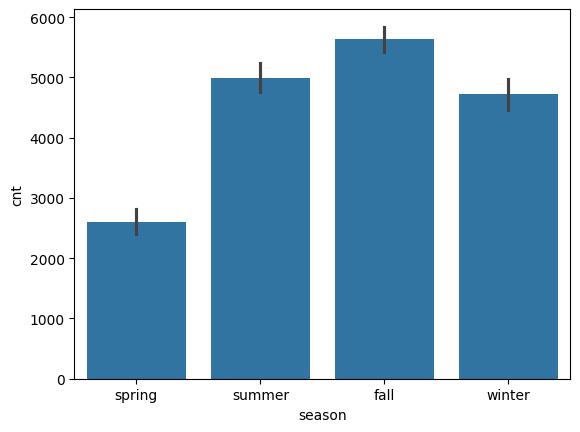

In [20]:
# PLOTTING BARPLOT
sns.barplot(x='season',y='cnt',data=boom_bike)

<Axes: xlabel='weathersit', ylabel='cnt'>

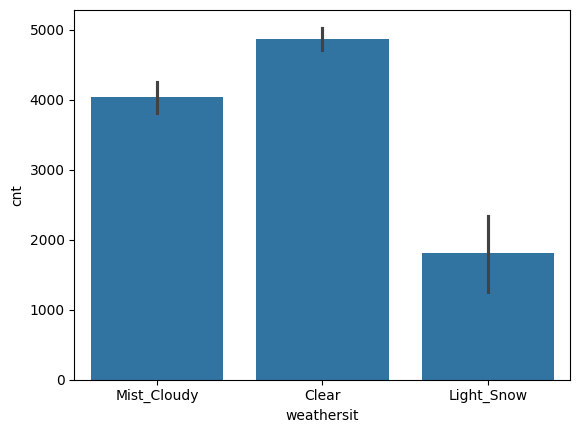

In [21]:
sns.barplot(x='weathersit',y='cnt',data=boom_bike)

<Axes: xlabel='yr', ylabel='cnt'>

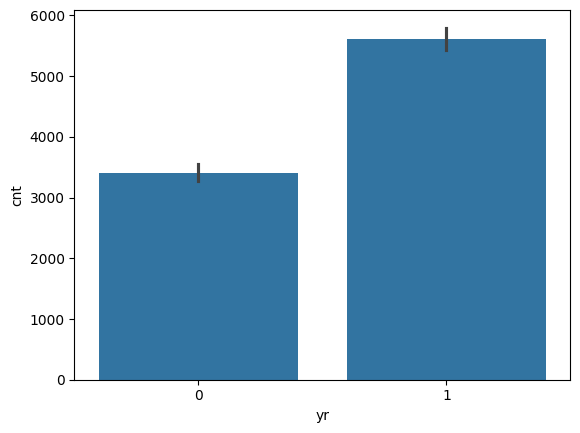

In [22]:
sns.barplot(x='yr',y='cnt',data=boom_bike)

<Axes: xlabel='mnth', ylabel='cnt'>

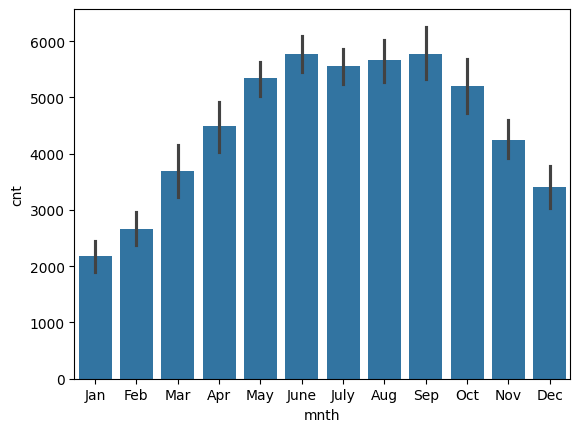

In [23]:
sns.barplot(x='mnth',y='cnt',data=boom_bike)

<Axes: xlabel='weekday', ylabel='cnt'>

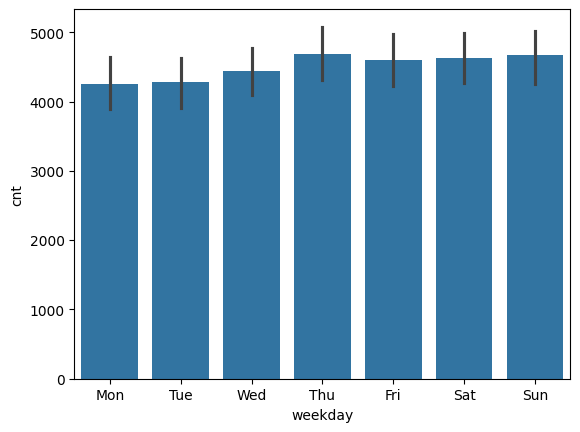

In [24]:
sns.barplot(x='weekday',y='cnt',data=boom_bike)

<Axes: xlabel='holiday', ylabel='cnt'>

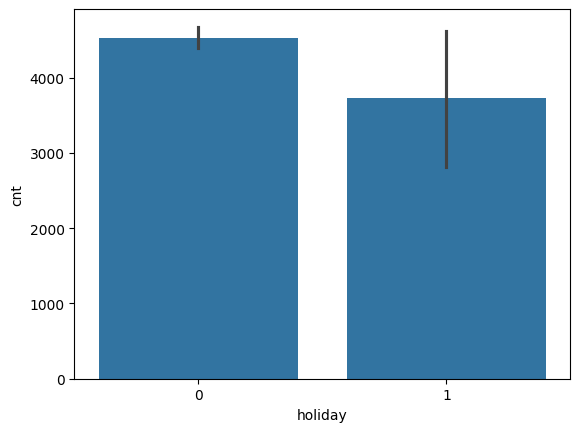

In [25]:
sns.barplot(x='holiday',y='cnt',data=boom_bike)

<Axes: xlabel='weekday', ylabel='cnt'>

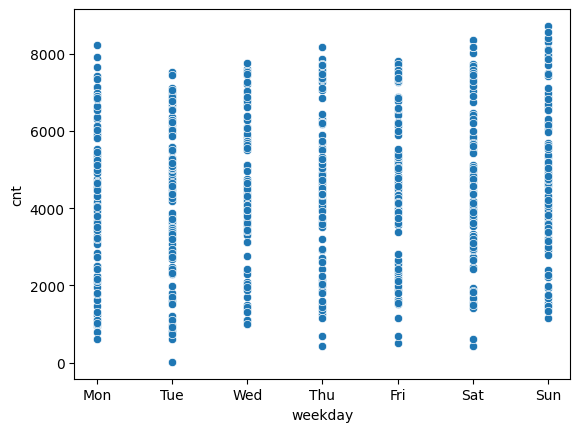

In [26]:
#PLOTTING SCATTERPLOT
sns.scatterplot(x='weekday', y='cnt',data=boom_bike)


<Axes: xlabel='season', ylabel='cnt'>

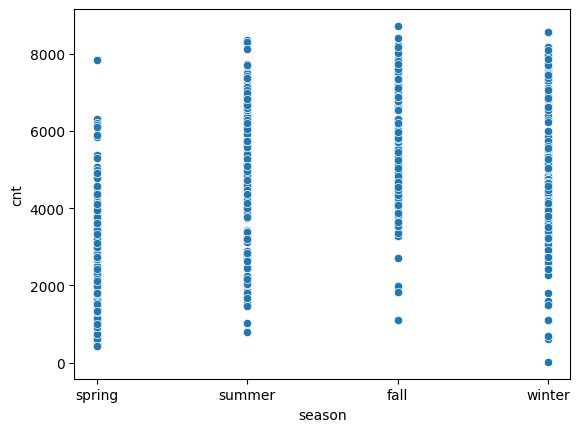

In [27]:
sns.scatterplot(x='season', y='cnt',data=boom_bike)

<Axes: xlabel='weathersit', ylabel='cnt'>

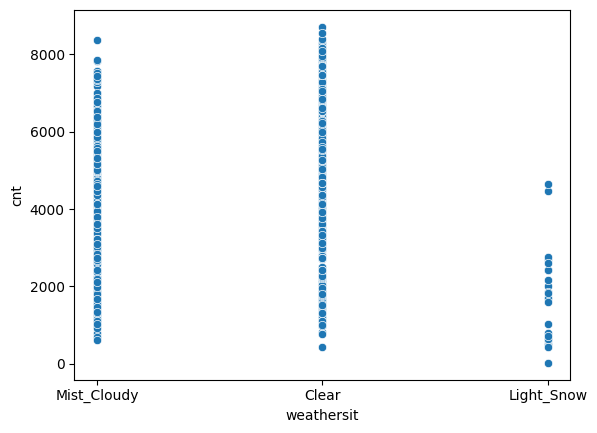

In [28]:
sns.scatterplot(x='weathersit', y='cnt',data=boom_bike)

<Axes: xlabel='mnth', ylabel='cnt'>

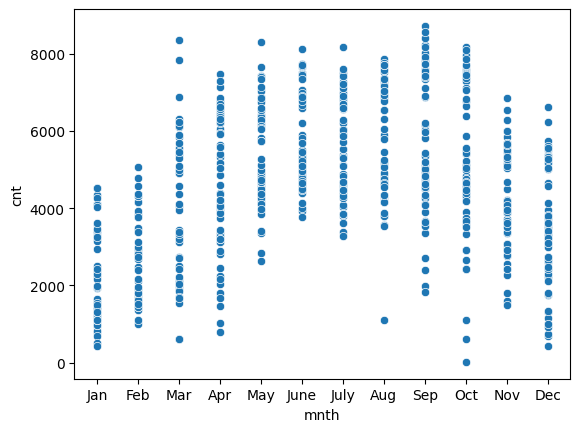

In [29]:
sns.scatterplot(x='mnth', y='cnt',data=boom_bike)

<Axes: xlabel='yr', ylabel='cnt'>

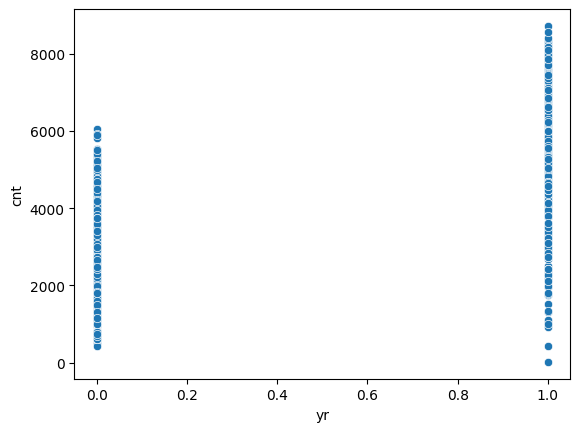

In [30]:
sns.scatterplot(x='yr', y='cnt',data=boom_bike)

<Axes: xlabel='holiday', ylabel='cnt'>

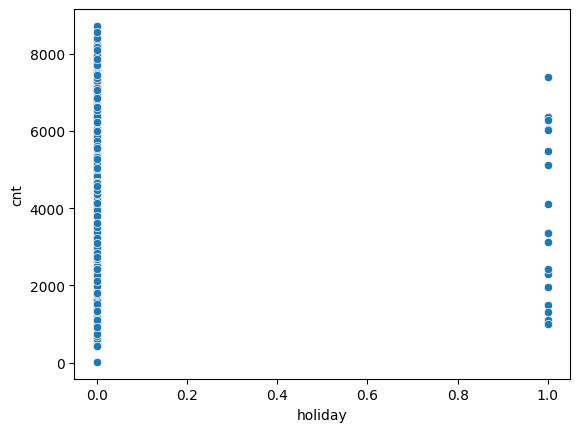

In [31]:
sns.scatterplot(x='holiday', y='cnt',data=boom_bike)

#**STEP3 : DATA PREPARATION**

In [32]:
# Get the dummy variable
season_cat = pd.get_dummies(boom_bike['season'], dtype=int)

In [33]:
boom_bike = pd.concat([boom_bike, season_cat], axis = 1)

In [34]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter
0,spring,0,Jan,0,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,spring,0,Jan,0,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,spring,0,Jan,0,Wed,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [35]:
weather_cat = pd.get_dummies(boom_bike['weathersit'],dtype=int)

In [36]:
boom_bike = pd.concat([boom_bike, weather_cat], axis = 1)

In [37]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Clear,Light_Snow,Mist_Cloudy
0,spring,0,Jan,0,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1
1,spring,0,Jan,0,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,1
2,spring,0,Jan,0,Wed,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,1,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0


In [38]:
mnth_cat = pd.get_dummies(boom_bike['mnth'],dtype=int)

In [39]:
boom_bike = pd.concat([boom_bike,mnth_cat],axis = 1)

In [40]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wed,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thu,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [41]:
wkday_cat = pd.get_dummies(boom_bike['weekday'],dtype=int)

In [42]:
boom_bike = pd.concat([boom_bike, wkday_cat],axis = 1)

In [43]:
boom_bike.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,...,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Mon,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,0,1,0,0,0,0,0,0


In [44]:
boom_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'fall', 'spring', 'summer',
       'winter', 'Clear', 'Light_Snow', 'Mist_Cloudy', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [45]:
boom_bike.drop(['season','mnth','weekday','weathersit'], axis = 1 , inplace = True)

In [46]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(boom_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,29.246653,33.1448,70.4167,11.083475,7216,1,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [48]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'fall',
       'spring', 'summer', 'winter', 'Clear', 'Light_Snow', 'Mist_Cloudy',
       'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [50]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [51]:
scaler = StandardScaler()

In [52]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [53]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,0,...,0,1,0,0,0,0,0,0,0,1
576,1,0,1.231731,1.194106,0.516433,-0.330615,1.399629,1,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,0,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,0,0,1,...,0,0,0,0,0,0,1,0,0,0


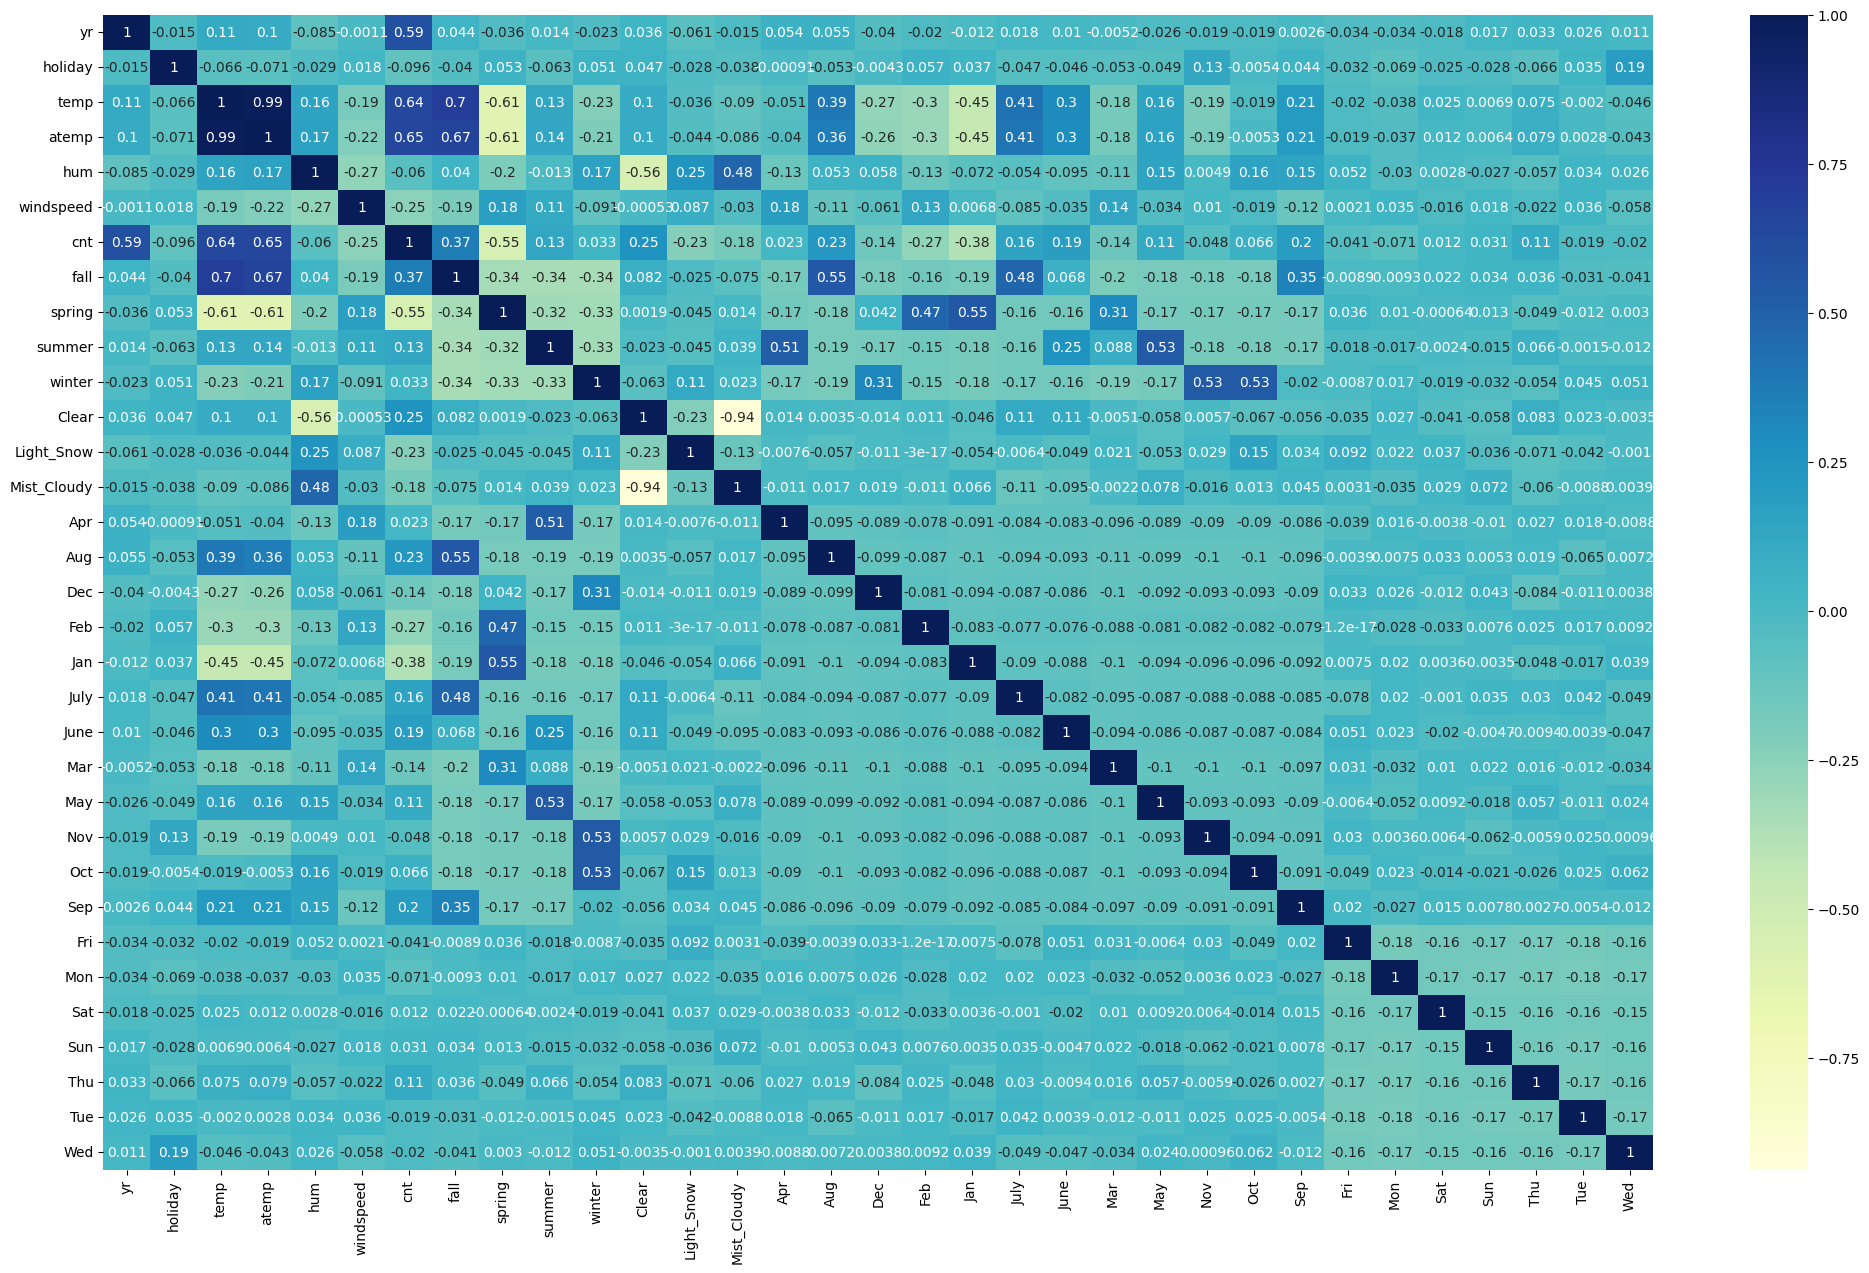

In [54]:
plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#**STEP4 : Dividing into X and Y sets for the model building**

In [55]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

#**STEP5 : Building model using statsmodel, for the detailed statistics**

In [ ]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# As p value of "Feb is max"
X_train_new = X_train_rfe.drop(["Feb"], axis = 1)

In [ ]:

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
print(lm.summary())

In [ ]:
# As p value of "summer is max"
X_train_new = X_train_rfe.drop(["Mist_Cloudy ".strip()], axis=1)

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Plot', fontsize = 20)                  # Plot heading
plt.xlabel('Residual', fontsize = 18)                         # X-label

#**STEP6 : Making Predictions**

In [ ]:
# Apply standardization() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [ ]:
y_pred=lm.predict(X_test_new)

#**STEP7 : MODEL EVALUATION**


In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#**STEP7 : Caculate R^2 on test data**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)